In [1]:
# Внимание!!! Важно, что бы файлы с данными и исполняемый файл находились в одной папке, 
# тогда пути к тестовым и тренировочным наборам будут содержать только имена файлов.
# 
# В пути к тренировочным и тестовым данным запрежается использовать абсалютную адресацию, 
# то есть адресацию, в которой присутствуют имена папок. Путь должен содержать только имя файла.
#
# Напоминание: под моделью машинного обучения понимаются все действия с исходными данными, 
# которые необходимо произвести, что бы сопоставить признаки целевому значению.

### Область работы 1 (библиотеки)

In [2]:
# Данный блок в области 1 НЕ выполняется преподавателем
# 
# данный блок предназначен только для подключения необходимых библиотек
# запрещается подключать библиотеки в других блоках
# запрещается скрывать предупреждения системы
# установка дополнительных библиотек размещается прямо здесь (обязательно закоментированы)
# pip install

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
import pandas.plotting as pd_plt
import matplotlib.colors as plt_colors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, validation_curve
from sklearn.preprocessing import StandardScaler, Normalizer, PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer
from sklearn.model_selection import cross_val_score, train_test_split, validation_curve, GridSearchCV, KFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.preprocessing import MinMaxScaler,Normalizer, StandardScaler,RobustScaler
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, KFold,RandomizedSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from scipy.stats import randint
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PowerTransformer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
import category_encoders as ce
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import make_scorer, f1_score

import shap
from sklearn.feature_selection  import RFE


from sklearn.feature_selection import SelectPercentile

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

### Область работы 2 (поиск  модели .... )

In [4]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели 
# должен быть понятен и очевиден отбор параметров модели
# оставляйте свои комментарии и разъяснения
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# ЗАПРЕЩАЕТСЯ ИСПОЛЬЗОВАТЬ ТЕСТОВЫЙ НАБОР
#
# Путь к тренировочному набору
# 

path_train = pd.read_csv("train_house_С.csv") # содержит только имя файла, без имен папок !!!
df = path_train
df.head()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,3605000,1.307431,0.024120,0.0,-0.070044,-0.223185,0.809239,-1.308863,-0.734539,-0.929397,...,-0.991672,-0.263991,-0.141322,-1.599013,-0.570187,-1.528627,0.780013,-0.465315,0.405623,-0.679063
1,5215000,-0.478408,-0.024866,0.0,-0.126718,-0.223185,-0.520499,0.047278,1.361397,0.224410,...,-1.104034,-0.263991,-0.141322,0.701118,-0.570187,-1.324398,0.711996,2.149083,0.405623,-0.679063
2,7700000,3.093270,1.346730,0.0,0.666712,0.624632,-0.242150,1.403419,-0.734539,2.532024,...,-1.340582,1.791369,3.136137,1.512364,1.421812,0.698373,0.311803,-0.465315,0.405623,-0.679063
3,2940000,-0.478408,-0.024866,0.0,-0.659450,-0.223185,2.340136,1.403419,-0.734539,0.224410,...,-0.730686,-0.263991,-0.141322,0.251860,-0.570187,0.108186,-0.785574,-0.465315,-2.465344,-0.679063
4,7980000,3.093270,4.285865,0.0,2.366919,2.441383,1.164113,1.403419,-0.734539,2.532024,...,-1.001475,1.791369,3.136137,-0.534651,1.421812,0.226390,1.008504,-0.465315,0.405623,1.472618


In [5]:
df.describe()

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
count,4.080000e+02,408.000000,408.000000,408.0,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,...,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000,408.000000
mean,4.764039e+06,0.024953,0.027025,0.0,0.031260,0.003719,0.020649,0.024011,-0.035894,0.017969,...,-0.000860,0.003004,0.035404,-0.003971,-0.018481,0.027616,0.013474,-0.003951,0.018605,-0.004025
std,1.905402e+06,1.003787,1.031208,0.0,1.047375,1.040665,0.998102,1.003559,0.989247,1.003617,...,1.007290,0.998819,0.998998,0.996765,0.995771,0.997819,1.027201,0.997884,0.981679,0.999619
min,1.750000e+06,-4.050087,-5.413279,0.0,-5.000645,-1.827981,-1.424843,-1.308863,-0.734539,-0.929397,...,-1.633712,-2.319351,-3.418780,-1.669457,-0.570187,-1.631644,-1.805866,-0.465315,-2.465344,-0.679063
25%,3.395000e+06,-0.478408,-0.024866,0.0,-0.126718,-0.223185,-0.641764,-1.308863,-0.734539,-0.929397,...,-0.946931,-0.263991,-0.141322,-0.872640,-0.570187,-0.877768,-0.831631,-0.465315,0.405623,-0.679063
50%,4.273500e+06,-0.478408,-0.024866,0.0,-0.126718,-0.223185,-0.221465,0.047278,-0.734539,0.224410,...,-0.000274,-0.263991,-0.141322,-0.050405,-0.570187,0.005111,-0.028317,-0.465315,0.405623,-0.679063
75%,5.944750e+06,1.307431,0.371917,0.0,0.190654,-0.223185,0.446051,0.047278,1.361397,0.224410,...,0.809161,-0.263991,-0.141322,0.888664,1.421812,0.929088,0.934307,-0.465315,0.405623,1.472618
max,1.330000e+07,3.093270,4.285865,0.0,13.021551,13.826353,5.831355,4.115701,1.361397,2.532024,...,1.763150,7.957450,9.691053,1.692920,5.405809,1.729104,1.685216,2.149083,0.405623,1.472618


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

In [7]:
df.isna().sum()

price    0
0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
dtype: int64

In [8]:
numeric_features = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28']
numeric_transformer = Pipeline(
    steps=[("scaler", MinMaxScaler())]
)
CT = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
).set_output(transform = 'pandas')

display(CT)

res_ct = CT.fit_transform(X)
pd.DataFrame(res_ct).head()

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['0', '1', '2', '3', '4', '5', '6', '7', '8',
                                  '9', '10', '11', '12', '13', '14', '15', '16',
                                  '17', '18', '19', '20', '21', '22', '23',
                                  '24', '25', '26', '27', '28'])])

NameError: name 'X' is not defined

In [10]:
X = df.drop('price', axis = 1)
y = df.price

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=.3)

In [11]:
kfold = KFold(n_splits=10, shuffle=True)
rf1 = RandomForestRegressor()
# scorer = make_scorer(f1_score, average = 'weighted')

pipe = Pipeline([('transformer', CT), 
                 ('classifier', rf1)])

param_grid = {'classifier__n_estimators': [500],
    'classifier__criterion': ['absolute_error', 'poisson', 'friedman_mse'],
    'classifier__max_depth': [10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['sqrt']
}
             
CV_rf = GridSearchCV( pipe, param_grid, cv= kfold, n_jobs = -1, return_train_score=True)
CV_rf.fit(X_train, y_train)

print("Правильность для наилучшей модели на тестовом наборе: {:.6f}\n".format(CV_rf.score(X_test, y_test)))
print()
grid_result = pd.DataFrame(CV_rf.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

Правильность для наилучшей модели на тестовом наборе: 0.584658




,19,45,27,9,10,1,30,20,18,28,...,51,44,14,52,6,7,15,16,8,17
mean_fit_time,1.626802,1.72086,2.034889,3.947238,3.674701,3.801719,1.612942,1.616515,1.702126,1.642097,...,1.484303,1.480116,3.136153,1.452321,2.827401,2.808361,2.889403,2.869407,2.787073,2.986749
std_fit_time,0.030297,0.025262,0.071862,0.138568,0.129069,0.097886,0.009722,0.062934,0.037663,0.008652,...,0.023317,0.014763,0.068862,0.004903,0.031911,0.018291,0.039568,0.091383,0.023381,0.129269
mean_score_time,0.089882,0.092251,0.09877,0.090589,0.088103,0.093399,0.090441,0.097779,0.089852,0.090569,...,0.092311,0.095453,0.094699,0.088644,0.090329,0.093198,0.087057,0.09024,0.090536,0.089961
std_score_time,0.004203,0.003774,0.010661,0.002765,0.003226,0.002392,0.001997,0.01286,0.002057,0.001807,...,0.002936,0.006499,0.007223,0.00213,0.005592,0.006545,0.002913,0.004906,0.004878,0.004826
param_classifier__criterion,poisson,friedman_mse,poisson,absolute_error,absolute_error,absolute_error,poisson,poisson,poisson,poisson,...,friedman_mse,friedman_mse,absolute_error,friedman_mse,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error
param_classifier__max_depth,10,20,20,20,20,10,20,10,10,20,...,20,10,20,20,10,10,20,20,10,20
param_classifier__max_features,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,...,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt,sqrt
param_classifier__min_samples_leaf,1,1,1,1,1,1,2,1,1,1,...,4,4,2,4,4,4,4,4,4,4
param_classifier__min_samples_split,5,2,2,2,5,5,2,10,2,5,...,2,10,10,5,2,5,2,5,10,10
param_classifier__n_estimators,500,500,500,500,500,500,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500


In [12]:
CV_rf.best_estimator_.get_params('max_features')

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('scaler', MinMaxScaler())]),
                                    ['0', '1', '2', '3', '4', '5', '6', '7', '8',
                                     '9', '10', '11', '12', '13', '14', '15', '16',
                                     '17', '18', '19', '20', '21', '22', '23',
                                     '24', '25', '26', '27', '28'])])),
  ('classifier',
   RandomForestRegressor(criterion='poisson', max_depth=10, max_features='sqrt',
                         min_samples_split=5, n_estimators=500))],
 'verbose': False,
 'transformer': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('scaler', MinMaxScaler())]),
                                  ['0', '1', '2', '3', '4', '5', '6', '7', '8',
                                   '9', '10', '11', '12', '13', '14', '15', '16',
                                

In [13]:
rfc = RandomForestRegressor(criterion='poisson', max_depth=40, max_features='sqrt', min_samples_leaf = 1,
                       n_estimators=750)
rfc.fit(X_train,y_train)
print('Правильность на обучающем наборе: {:.3f}'.format(rfc.score(X_train, y_train)))
print('Правильность на тестовом наборе: {:.3f}'.format(rfc.score(X_test, y_test)))

Правильность на обучающем наборе: 0.952
Правильность на тестовом наборе: 0.584


In [14]:
y_pred_train=rfc.predict(X_train)
y_pred=rfc.predict(X_test)


In [15]:
print('тестовый MSE: {:.3f}'.format( mean_squared_error(y_test,y_pred) ) )
print('тестовый MAPE: {:.3f}'.format( mean_absolute_percentage_error(y_test,y_pred)))

тестовый MSE: 1518288946877.286
тестовый MAPE: 0.191


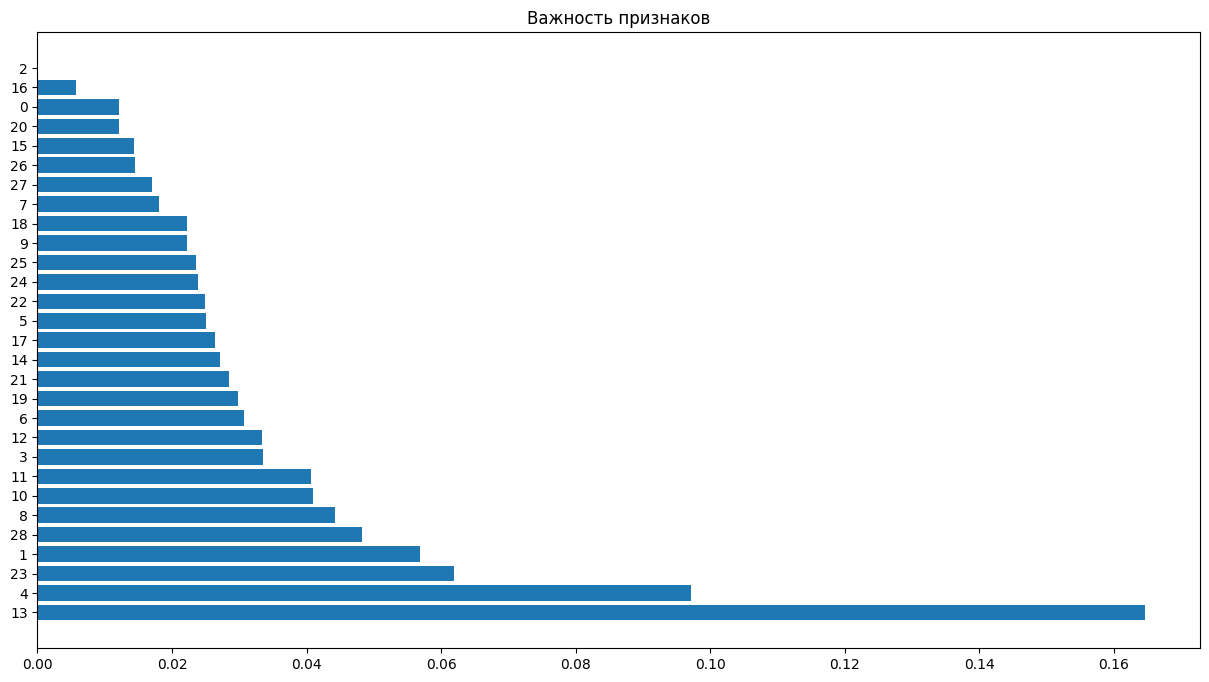

In [16]:
plt.figure(figsize=(15,8))
feature_names = np.array(X.columns)

importance = np.sort(rfc.feature_importances_)
importance_name = np.argsort(rfc.feature_importances_)

plt.barh(width=importance, y = feature_names[importance_name], )
ax = plt.gca()
ax.invert_yaxis()
plt.title("Важность признаков")
plt.show()

In [17]:
top = np.argsort(importance_name)
top_features = top[-11:]
top_features

array([ 8, 17,  3, 16, 12, 26, 11, 10,  5,  6, 24])

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

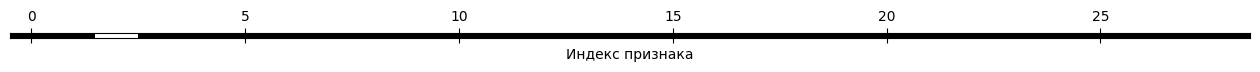

In [18]:
transform_threshold = VarianceThreshold(threshold=(.8 * (1 - .8)))
transform_threshold.fit_transform(X_train)

mask = transform_threshold.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.1);
plt.yticks([])
plt.xlabel("Индекс признака")
transform_threshold.get_support()

array([ True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

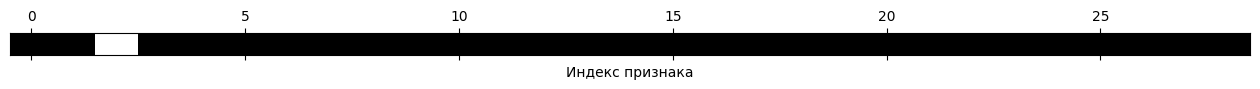

In [19]:
ths = (.9 * (1 - .9))
df_var = VarianceThreshold(threshold = ths)
df_var.fit_transform(X_train)
mask = df_var.get_support()


plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака")
df_var.get_support()

array(['1', '3', '4', '5', '8', '10', '11', '12', '13', '14', '17', '19',
       '23', '28'], dtype=object)

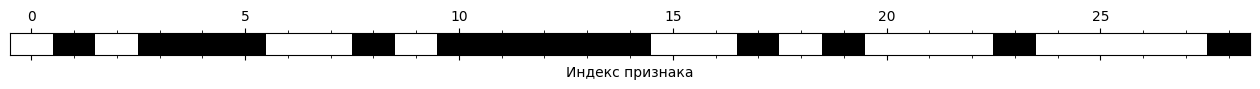

In [20]:
rfe_select = RFE(rfc)

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask3 = rfe_select.get_support()
plt.matshow( mask3.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask3.sum()
rfe_select.get_feature_names_out()

Features [2] are constant.
invalid value encountered in divide


array(['1', '3', '4', '5', '6', '8', '10', '13', '14', '15', '20', '21',
       '23', '28'], dtype=object)

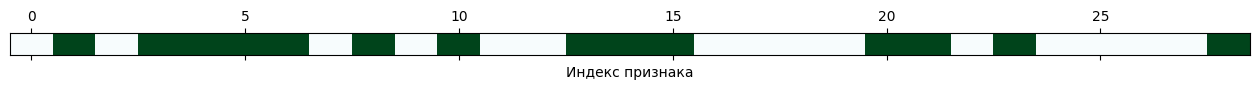

In [21]:
select_pct = SelectPercentile(percentile=50)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

mask4 = select_pct.get_support()
plt.matshow( mask4.reshape(1,-1), cmap = 'BuGn', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");
select_pct.get_feature_names_out()

,mean,std
28,0.048187,0.070667
1,0.056913,0.063990
23,0.061965,0.092727
4,0.097187,0.124025
13,0.164610,0.142246


,mean,std
2,0.000000,0.000000
16,0.005728,0.010700
0,0.012102,0.022885
20,0.012145,0.031923
15,0.014297,0.024601
26,0.014492,0.027672
27,0.017040,0.024866
7,0.018092,0.022802
18,0.022232,0.015901
9,0.022250,0.015909


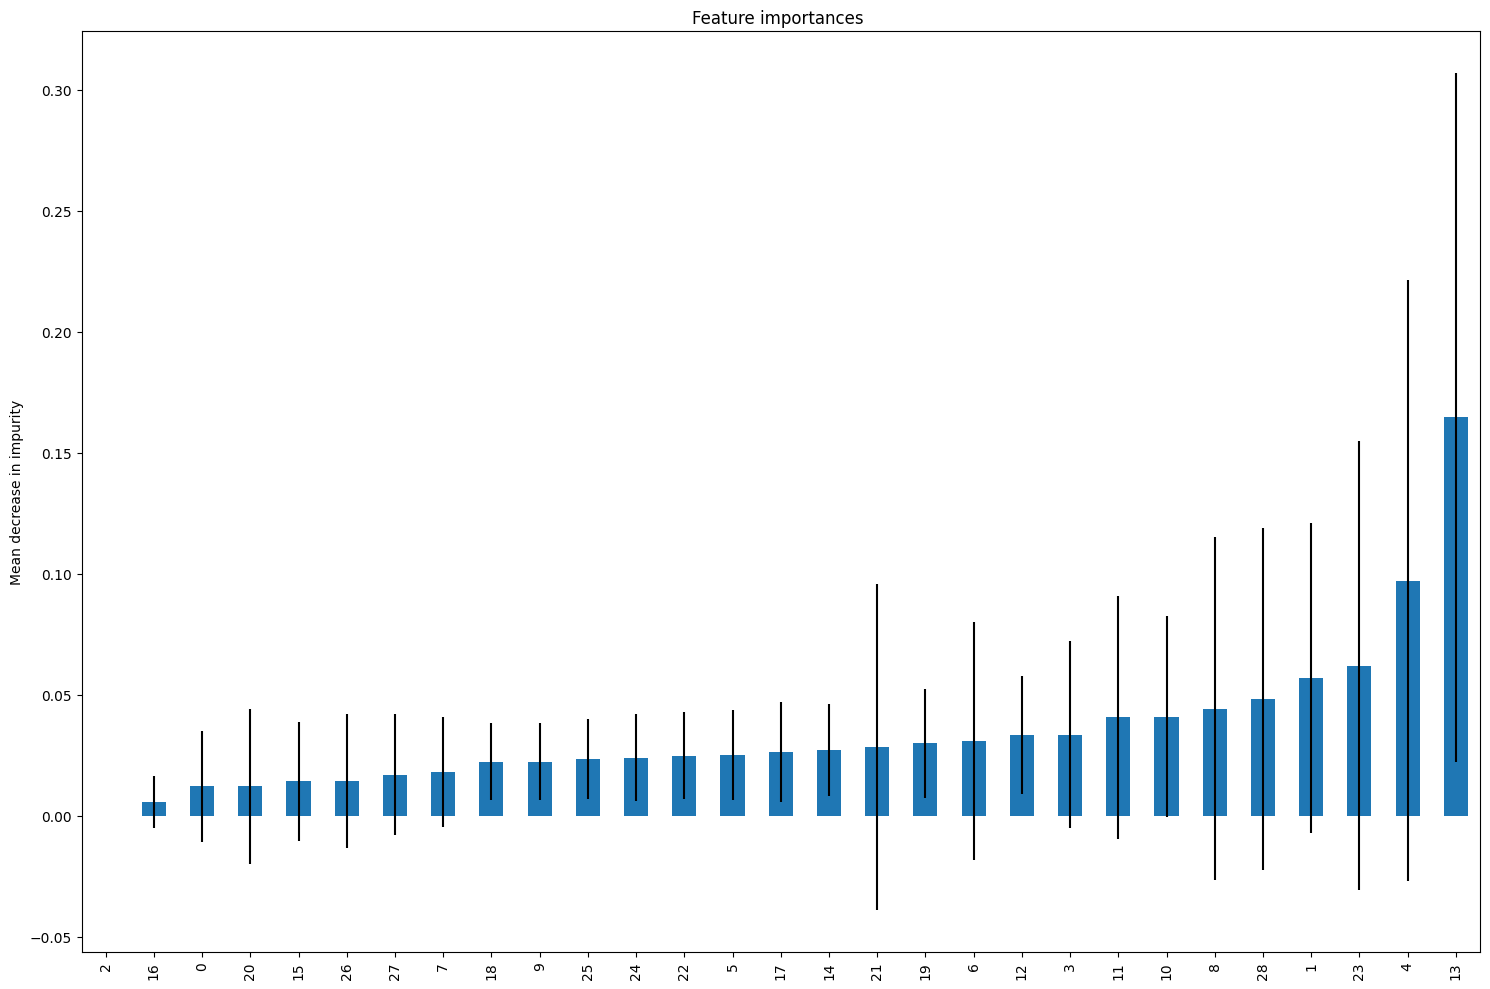

In [22]:
# feature_names = cancer.feature_names
forest_importances = pd.DataFrame(rfc.feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances ")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest.tail(5))
display(sort_forest.head(15))

Оптимально : 29


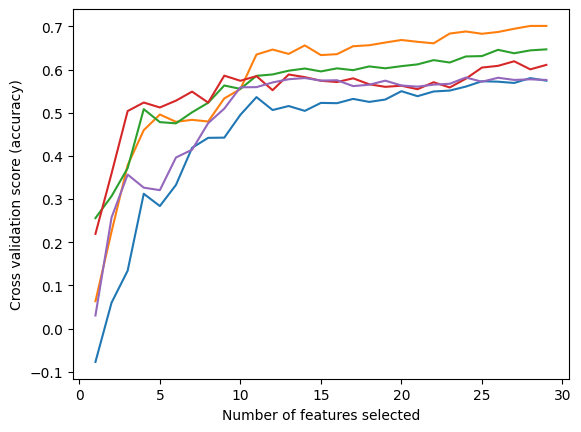

In [23]:
min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=rfc,
    step=1,
    cv=KFold(5),
#     scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Оптимально : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
filtered = pd.DataFrame(rfecv.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.show()

In [24]:
rfecv.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1])

Оптимально : 22


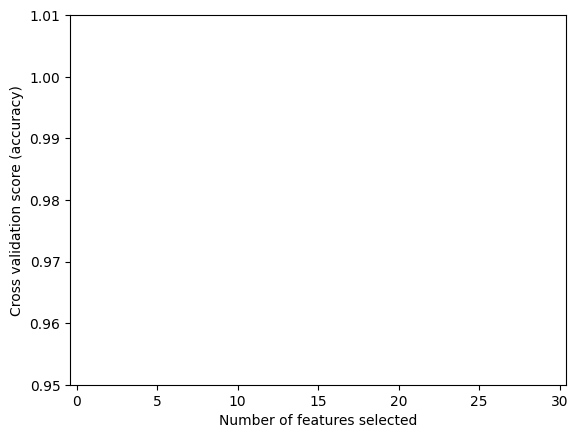

In [25]:
# Create the RFE object and compute a cross-validated score.
svr = SVR(kernel = 'linear')
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv1 = RFECV(
    estimator=svr,
    step=1,
    cv=KFold(5),
    n_jobs = -1,
#      scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv1.fit(X_train, y_train)

print("Оптимально : %d" % rfecv1.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
filtered = pd.DataFrame(rfecv1.cv_results_).filter(regex='split') #[s for s in rfecv.cv_results_.keys() if 'split' in s]
plt.plot(
    range(min_features_to_select, len(filtered) + min_features_to_select),
    filtered
)
plt.ylim((0.95,1.01))
plt.show()

In [35]:
rfecv1.ranking_

array([1, 6, 8, 1, 1, 1, 1, 1, 1, 4, 1, 1, 7, 1, 1, 1, 1, 1, 5, 1, 1, 1,
       1, 1, 2, 3, 1, 1, 1])

In [36]:
explainer = shap.explainers.Tree(rfc, X_train)
shap_values = explainer.shap_values(X_train)

100%|===================| 284/285 [00:29<00:00]        

AssertionError: Summary plots need a matrix of shap_values, not a vector.

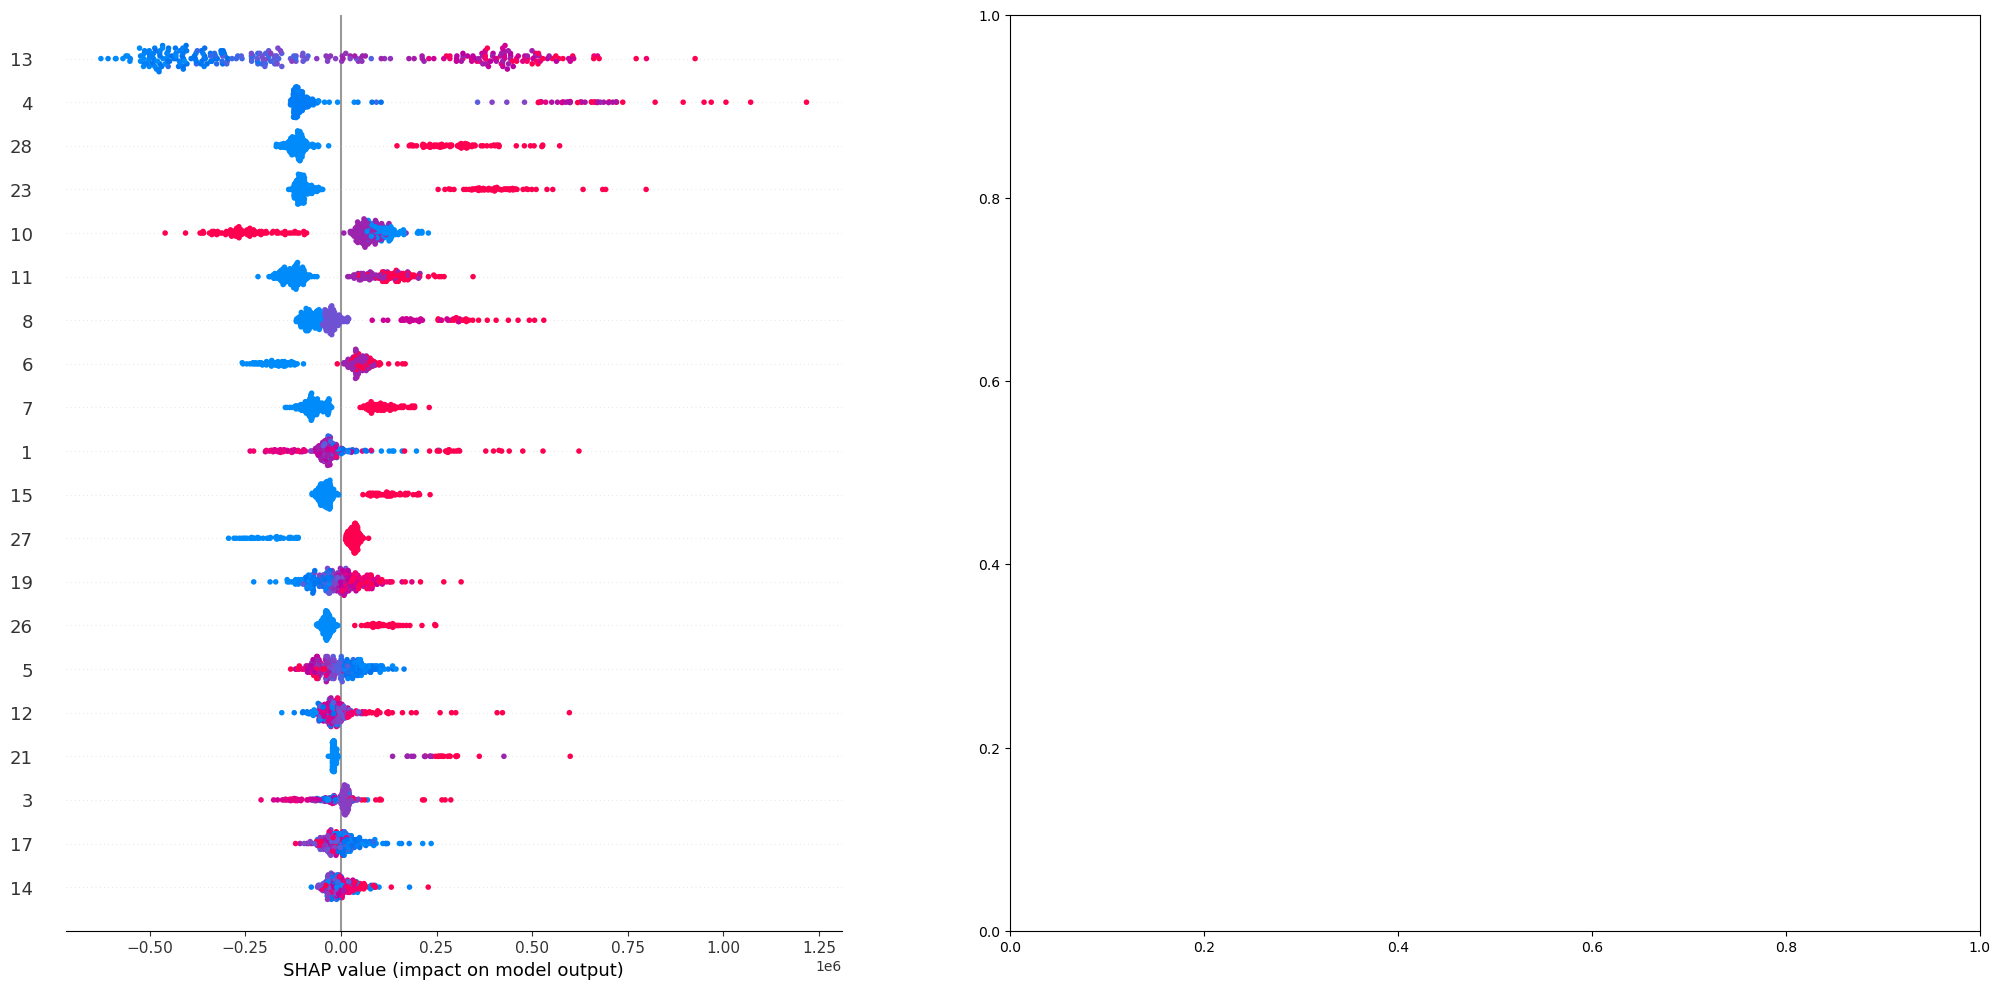

In [37]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
shap.summary_plot(shap_values = shap_values, 
                  features = X_train,
                  feature_names=feature_names, 
                  plot_size=None, show=False) # это нужно только для отрисовки графиков рядом в subplot
plt.subplot(1,2,2)
shap.summary_plot(shap_values[1], X_train, feature_names=feature_names, plot_size=None, show=False)

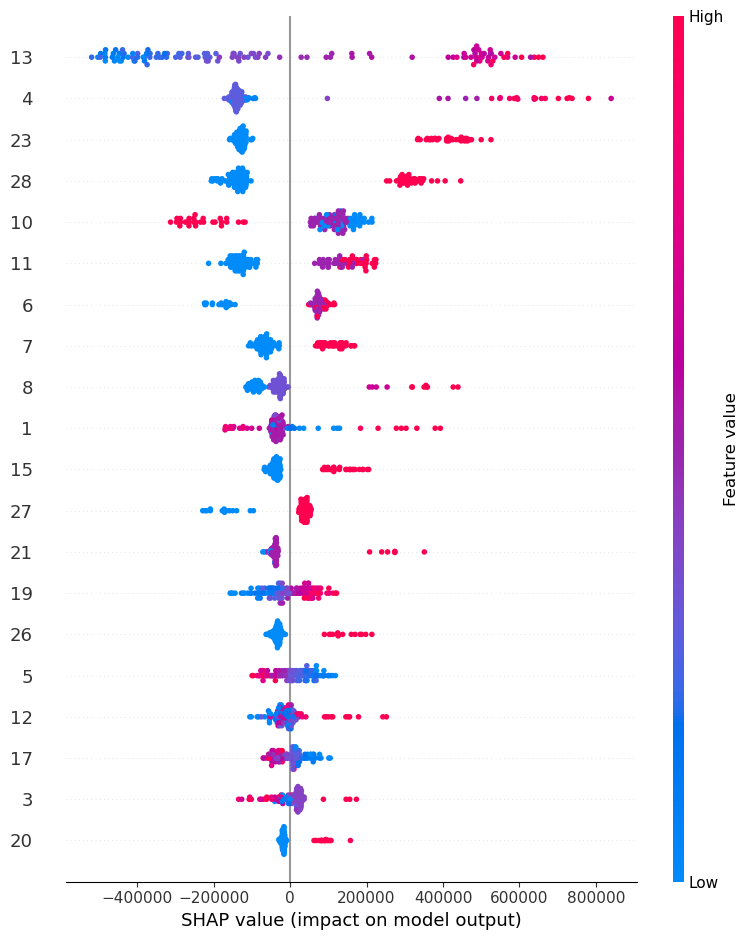

In [38]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

In [39]:
if method_train.values.ndim > 2:
    values = method_train.values[:,:,1]
else:
    values = method_train.values[:,1]

if method_train.base_values.ndim > 1:
    base_values = method_train.base_values[:,1]
else:
    base_values = method_train.base_values[1]

explanation_train = shap.Explanation(values = values, 
                base_values = base_values, 
                data = X_train.values, 
                feature_names = feature_names)

NameError: name 'method_train' is not defined

In [ ]:
def shapley_feature_ranking(explanation,func = np.mean):
    '''
    func по умолчанию np.mean, но можно заменить например на np.max
    '''
    feature_order = np.argsort(func(np.abs(explanation.values), axis=0))
    
    return pd.DataFrame(
        {
            "features": [explanation.feature_names[i] for i in feature_order][::-1],
            "importance": [
                func(np.abs(explanation.values), axis=0)[i] for i in feature_order
            ][::-1],
        }
    )

important_feature = shapley_feature_ranking(explanation_train)
display(important_feature.head(6))
#display(important_feature.importance.sum())